In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url="https://www.elcorteingles.es/supermercado/alimentacion-general/aceites/"

In [3]:
respuesta=requests.get(url)#solicitud al servidor

In [6]:
html=BeautifulSoup(respuesta.text,"html5lib")

In [9]:
productos=html.findAll("div",class_="product_tile-right_container")

In [10]:
productos[0]

<div class="product_tile-right_container"><div class="product_tile-price_holder"><div class="prices product_tile-prices"><div><div class="prices-price _current">
    <span>15</span>,<span>45</span>
    <span class="js-currency">€</span>
  </div><div class="prices-price _pum">(3,09 € / Litro)</div></div></div></div><div class="product_tile-description_holder"><h3 class="product_tile-description"><a class="link event" data-event="product_click" href="/supermercado/0110120902700291-el-corte-ingles-aceite-de-oliva-suave-04-bidon-5-l/" title="EL CORTE INGLES aceite de oliva suave 0,4º bidón 5 l ">EL CORTE INGLES aceite de oliva suave 0,4º bidón 5 l <span class="product_tile-temporal_description"></span></a></h3><div class="product_tile-offers_desktop_holder">  </div></div><div class="bazaar_voice-container"><div class="BVRRInlineRating hidden" data-bv-product-id="0110120902700291___" data-bv-redirect-url="/supermercado/0110120902700291-el-corte-ingles-aceite-de-oliva-suave-04-bidon-5-l/" da

In [29]:
listaProd=[]
for producto in productos:
    precio=producto.find(class_="_current")
    nombre=producto.find(class_="product_tile-description").find("a")
    porLitro=producto.find(class_="_pum")
    if precio:
        listaProd.append((nombre.text.strip(),
            precio.text.replace(",",".").replace("€","").strip(),
            porLitro.text.replace("(","").replace(" € / Litro)","").replace(",",".")))


print(len(listaProd),listaProd)

23 [('EL CORTE INGLES aceite de oliva suave 0,4º bidón 5 l', '15.45', '3.09'), ('EL CORTE INGLES aceite de oliva suave 0,4º botella 1 l', '3.03', '3.03'), ('EL CORTE INGLES aceite de oliva intenso 1º bidón 5 l', '15.45', '3.09'), ('EL CORTE INGLES aceite de oliva intenso 1º botella 1 l', '3.15', '3.15'), ('CARBONELL aceite de oliva suave 0,4º pack 6 botellas 1 l', '26.82', '4.47'), ('CARBONELL aceite de oliva suave 0,4º lata 5 l', '23.45', '4.69'), ('CARBONELL aceite de oliva suave 0,4º bidón 3 l', '13.25', '4.42'), ('CARBONELL aceite de oliva suave 0,4º botella 2 l', '8.95', '4.48'), ('CARBONELL aceite de oliva suave 0,4º pack 2 botellas 1 l', '8.95', '4.48'), ('CARBONELL aceite de oliva suave 0,4º botella 1 l', '4.49', '4.49'), ('CARBONELL aceite de oliva intenso 1º botella 1 l', '4.49', '4.49'), ('ALIADA aceite de oliva suave 0,4º bidón 5 l', '14.65', '2.93'), ('ALIADA aceite de oliva suave 0,4º botella 1 l', '2.99', '2.99'), ('ALIADA aceite de oliva intenso 1º bidón 5 l', '14.65', 

In [30]:
productosDF=spark.createDataFrame(listaProd,["Nombre","Precio","Precio/litro"])

In [31]:
productosDF.show()

+--------------------+------+------------+
|              Nombre|Precio|Precio/litro|
+--------------------+------+------------+
|EL CORTE INGLES a...| 15.45|        3.09|
|EL CORTE INGLES a...|  3.03|        3.03|
|EL CORTE INGLES a...| 15.45|        3.09|
|EL CORTE INGLES a...|  3.15|        3.15|
|CARBONELL aceite ...| 26.82|        4.47|
|CARBONELL aceite ...| 23.45|        4.69|
|CARBONELL aceite ...| 13.25|        4.42|
|CARBONELL aceite ...|  8.95|        4.48|
|CARBONELL aceite ...|  8.95|        4.48|
|CARBONELL aceite ...|  4.49|        4.49|
|CARBONELL aceite ...|  4.49|        4.49|
|ALIADA aceite de ...| 14.65|        2.93|
|ALIADA aceite de ...|  2.99|        2.99|
|ALIADA aceite de ...| 14.65|        2.93|
|ALIADA aceite de ...|  2.87|        2.87|
|COOSUR aceite de ...|  3.89|        3.89|
|COOSUR aceite de ...|  3.89|        3.89|
|LA ESPAÑOLA aceit...| 19.15|        3.83|
|LA ESPAÑOLA aceit...| 11.75|        3.92|
|LA ESPAÑOLA aceit...|  3.99|        3.99|
+----------

In [35]:
productosDF2=productosDF\
    .withColumn("Precio",productosDF.Precio.cast("float"))\
    .withColumn("Precio/litro",productosDF["Precio/litro"].cast("float"))

In [36]:
productosDF2.printSchema(),productosDF2.show()

root
 |-- Nombre: string (nullable = true)
 |-- Precio: float (nullable = true)
 |-- Precio/litro: float (nullable = true)

+--------------------+------+------------+
|              Nombre|Precio|Precio/litro|
+--------------------+------+------------+
|EL CORTE INGLES a...| 15.45|        3.09|
|EL CORTE INGLES a...|  3.03|        3.03|
|EL CORTE INGLES a...| 15.45|        3.09|
|EL CORTE INGLES a...|  3.15|        3.15|
|CARBONELL aceite ...| 26.82|        4.47|
|CARBONELL aceite ...| 23.45|        4.69|
|CARBONELL aceite ...| 13.25|        4.42|
|CARBONELL aceite ...|  8.95|        4.48|
|CARBONELL aceite ...|  8.95|        4.48|
|CARBONELL aceite ...|  4.49|        4.49|
|CARBONELL aceite ...|  4.49|        4.49|
|ALIADA aceite de ...| 14.65|        2.93|
|ALIADA aceite de ...|  2.99|        2.99|
|ALIADA aceite de ...| 14.65|        2.93|
|ALIADA aceite de ...|  2.87|        2.87|
|COOSUR aceite de ...|  3.89|        3.89|
|COOSUR aceite de ...|  3.89|        3.89|
|LA ESPAÑOLA ace

(None, None)

In [38]:
productosDF2.summary().show()

+-------+--------------------+------------------+------------------+
|summary|              Nombre|            Precio|      Precio/litro|
+-------+--------------------+------------------+------------------+
|  count|                  23|                23|                23|
|   mean|                null|10.377391265786212| 3.913913042648979|
| stddev|                null| 7.808486241897424|0.8008673832103498|
|    min|ALIADA aceite de ...|              2.87|              2.87|
|    25%|                null|              3.89|              3.09|
|    50%|                null|              8.95|              3.92|
|    75%|                null|             15.45|              4.48|
|    max|LA ESPAÑOLA aceit...|             26.82|              5.82|
+-------+--------------------+------------------+------------------+



In [40]:
productosP=productosDF2.orderBy("Precio/litro").toPandas()

In [41]:
productosP

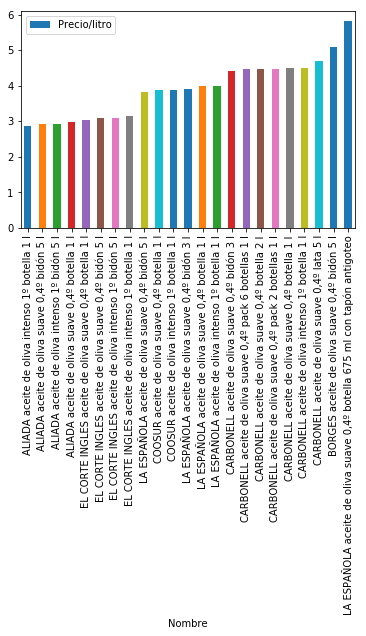

In [44]:
productosP.plot.bar(x="Nombre",y="Precio/litro")

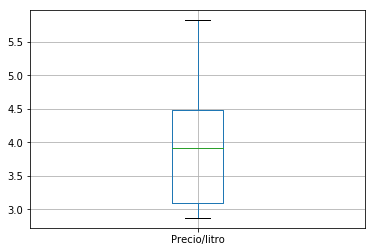

In [56]:
productosP.boxplot("Precio/litro")